本章练习中，将学习梯度下降方法用于逻辑回归分类

现在我们有一批数据，是学生们的两次考试成绩和录取结果，所以我们接下来要学习用逻辑回归模型来预测学生是否录取。

关键词：逻辑回归，梯度下降，随机梯度下降，小批量梯度下降，

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 首先我们先查看数据
dataset = pd.read_csv('data.txt')
print(dataset.shape)
dataset.head()

(99, 3)


,34.62365962451697,78.0246928153624,0
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


In [2]:
# 数据集没有title，并且把title值给去掉了，所以我们采用添加title来读取
dataset = pd.read_csv('data.txt', names=['Score1', 'Score2', 'Admitted'])
print(dataset.shape)
dataset.head()

(100, 3)


,Score1,Score2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0, 0.5, 'Score2')

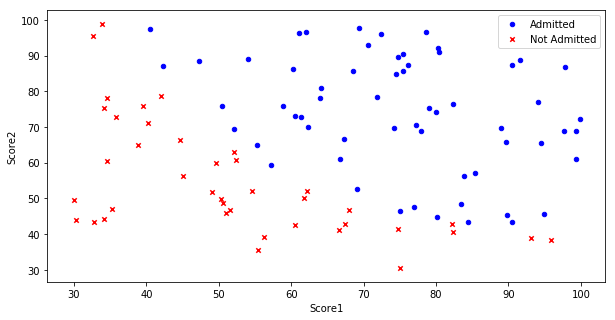

In [4]:
# 可以看到1是录取，0是不录取的
# 现在让我们把这些数据在图上展示出来看看

# 先把两个类别的数据给分开
pos = dataset[dataset['Admitted'] == 1] 
neg = dataset[dataset['Admitted'] == 0]

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(pos['Score1'], pos['Score2'], s=20, c='b', marker='o', label='Admitted')
ax.scatter(neg['Score1'], neg['Score2'], s=20, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Score1')
ax.set_ylabel('Score2')


从上面图中，我们可以想到在两个类别中间划分的界线是如何的，现在让我们来求这个函数

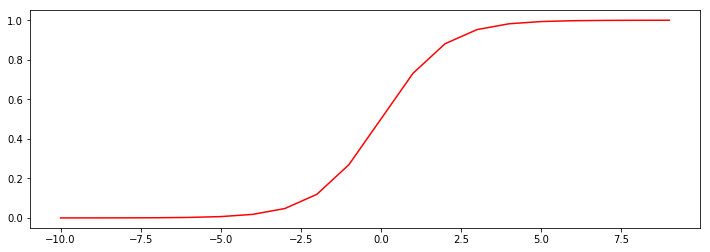

In [3]:
# 设置sigmoid函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# sigmoid函数是逻辑回归分类的重点
# 如果不知道sigmoid函数是怎样的，可以用下图参考
nums = np.arange(-10, 10, step=1)
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(nums, sigmoid(nums), 'r')

In [4]:
# 根据逻辑回归里面的公式，需要求出sigmoid函数里面的z，也就是h(x)也就是g(θTX)
def model(X, theta):
    return sigmoid(np.dot(X, theta.T))

# 因为h(x) = θ0X0 + θ1X1 + ... + θnXn，而这里X0=1，所以我们构造第一列“特征”
dataset.insert(0, 'X0', 1)

# 把原来的DataFrame转成matrix方便之后应用计算
dataMat = dataset.values

# 特征数目
cols = dataMat.shape[1]

# 把特征值和标签分别保存
X = dataMat[:, 0:cols-1]
y = dataMat[:, cols-1 :]

# 初始化θ
theta = np.zeros([1, 3])

In [7]:
# 在这里发现一个小区别，原以为-1是最后一列
print(dataMat[:, -1])
print(dataMat[:, -1:])
print(dataMat[:, cols-1 :])

[0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1.]
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1

In [8]:
print(X[:5])
print(y[:5])
print(theta)

[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]]
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]]
[[0. 0. 0.]]


In [5]:
# 接下来是损失函数
# 已知对数似然函数为L=(ylog(h(x))+(1-y)log(1-h(x)))
# 似然函数目标是最大值，但我们需要求梯度反方向即最小值，也就是负的
# 当y=0，损失函数L=-log(1-h(x))
# 当y=1，损失函数L=-log(h(x))
# 所以我们得到下面的损失函数
# 求和然后除样本数，得到平均损失
def cost(X, y, theta):
    left = np.multiply(y, np.log(model(X, theta)))
    right = np.multiply(1 - y, np.log(1 - model(X, theta)))
#     return np.sum(-(left + right))
    return np.sum(-(left + right)) / len(X)

cost(X, y, theta)

0.6931471805599453

In [6]:
# 计算梯度
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X, theta) - y).ravel()
    # 循环计算每列特征的梯度
    for j in range(len(theta.ravel())):
        # multiply 数组对应位置元素相乘
        term = np.multiply(error, X[:, j])
        grad[0, j] = np.sum(term) / len(X)
    return grad

In [11]:
# 三种梯度下降和停止策略
STOP_ITER = 0
STOP_COST = 1
STOP_GRAD = 2

def stop(type, value, threshold):
    if type == STOP_ITER:
        # 根据迭代次数停止：大于迭代阈值就停止
        return value > threshold
    elif type == STOP_COST:
        # 根据损失值停止：当最新两次损失值误差小于阈值就停止
        return abs(value[-1] - value[-2]) < threshold
    elif type == STOP_GRAD:
        # 根据梯度变化停止：当梯度二次范数小于阈值就停止
        return np.linalg.norm(value) < threshold

# 因为我们希望数据没有顺序，可以让分类器泛化性能更好，所以我们要打乱数据
import numpy.random

def shuffle(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:, 0 : cols - 1]
    y = data[:, cols - 1 :]
    return X, y


In [7]:
# 在调用方法时候，我们记录时间，最后对比处理的时长
import time

def descent(data, theta, batchSize, stopType, thresh, alpha):
    
    init_time = time.time()
    i = 0 # 迭代次数
    k = 0 # 批量数据大小
    
    X, y = shuffle(data)
    grad = np.zeros(theta.shape)
    costs = [cost(X, y, theta)] # 损失值，初始化为theta初始值时候的损失
    
    while True:
        grad = gradient(X[k : k + batchSize], y[k : k + batchSize], theta)
        k += batchSize
        # 我们会设置一个n，在超过n次时，就重新打乱数据
        if k >= n:
            k = 0
            X, y = shuffle(data)
        theta = theta - alpha * grad
        costs.append(cost(X, y, theta))
        i += 1
        
        if stopType == STOP_ITER:
            value = i
        elif stopType == STOP_COST:
            value = costs
        elif stopType == STOP_GRAD:
            value = grad
        
        if stop(stopType, value, thresh):
            break
    return theta, i - 1, costs, grad, time.time() - init_time

In [ ]:
weights = np.ones((3, 1))

h = sigmoid(np.dot(X[:5], weights)) # mat[m, 1] = sigmoid(mat[m, n] * mat[n, 1]) 按每个样本计算
error = (y[:5]-h)
weights = weights + 0.001 * np.dot(X[:5].T, error)
print('weights: ', weights)

In [13]:
# 
def runExp(data, theta, batchSize, stopType, thresh, alpha):
    theta, iter, costs, grad, dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    name = 'Original' if (data[:, 1] > 2).sum() > 1 else 'Scaled'
    name += ' data - learning rate: {} - '.format(alpha)
    if batchSize == n:
        strDescType = 'Gradient'
    elif batchSize == 1:
        strDescType = 'Stochastic'
    else:
        strDescType = 'Mini-batch ({})'.format(batchSize)
    name += strDescType + ' descent - Stop: '
    
    if stopType == STOP_ITER:
        strStop = '{} iterations'.format(thresh)
    elif stopType == STOP_COST:
        strStop = 'costs change < {}'.format(thresh)
    else:
        strStop = 'gradient norm < {}'.format(thresh)
    name += strStop
    
    print('{} Theta: {} - Iter: {} - Last cost: {:.2f} - Duration: {:.2f}s'.format(name, theta, iter, costs[-1], dur))
    
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return theta

C:\Users\XiXiao\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Users\XiXiao\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


Original data - learning rate: 1e-06 - Gradient descent - Stop: 5000 iterations Theta: [[ 1.06850648  0.00307701 -0.00781121]] - Iter: 5000 - Last cost: 0.71 - Duration: 1.26s


array([[ 1.06850648,  0.00307701, -0.00781121]])

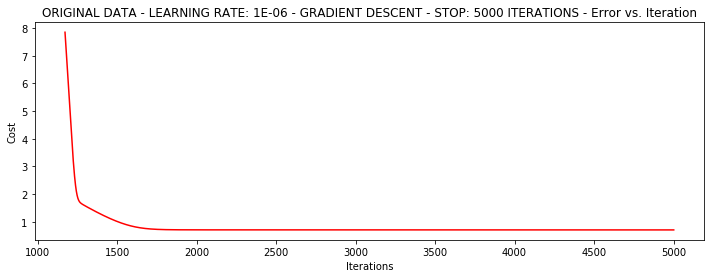

In [26]:
n=100

# 根据迭代次数停止，我们设置为5000次迭代
runExp(dataMat, theta, n, STOP_ITER, thresh=5000, alpha=0.000001)

In [ ]:
# 这次选择根据损失值停止，设置阈值为0.000001
runExp(dataMat, theta, n, STOP_COST, thresh=0.000001, alpha=0.001)

C:\Users\XiXiao\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Users\XiXiao\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


Original data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.05 Theta: [[-2.37033409  0.02721692  0.01899456]] - Iter: 40045 - Last cost: 0.49 - Duration: 10.81s


array([[-2.37033409,  0.02721692,  0.01899456]])

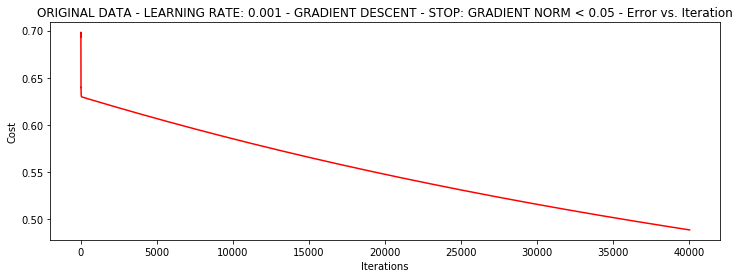

In [16]:
# 根据梯度变化，当范数小于0.05则停止
runExp(dataMat, theta, n, STOP_GRAD, thresh=0.05, alpha=0.001)

Original data - learning rate: 0.001 - Stochastic descent - Stop: 5000 iterations Theta: [[-0.37730145  0.02842879 -0.07050654]] - Iter: 5000 - Last cost: 2.17 - Duration: 0.44s


array([[-0.37730145,  0.02842879, -0.07050654]])

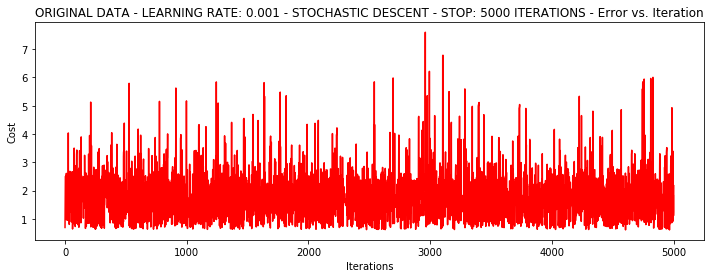

In [17]:
# 随机下降，所以这里不用n而用1，迭代次数5000次
runExp(dataMat, theta, 1, STOP_ITER, thresh=5000, alpha=0.001)

Original data - learning rate: 2e-06 - Stochastic descent - Stop: 15000 iterations Theta: [[-0.0020205   0.01007171  0.00100655]] - Iter: 15000 - Last cost: 0.63 - Duration: 1.33s


array([[-0.0020205 ,  0.01007171,  0.00100655]])

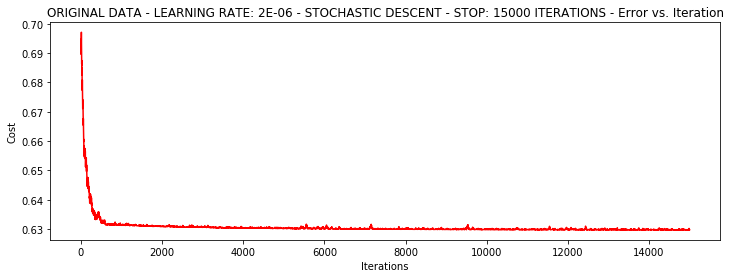

In [18]:
# 随机下降，迭代次数15000次，比上面的多了10000次，看last cost好了不少
runExp(dataMat, theta, 1, STOP_ITER, thresh=15000, alpha=0.000002)

Original data - learning rate: 0.001 - Mini-batch (16) descent - Stop: 15000 iterations Theta: [[-1.03721117  0.02873887  0.015466  ]] - Iter: 15000 - Last cost: 0.69 - Duration: 1.93s


array([[-1.03721117,  0.02873887,  0.015466  ]])

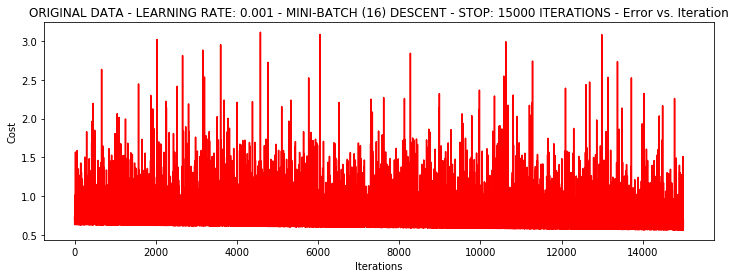

In [19]:
# 小批量下降，设置为16个，迭代150000次
runExp(dataMat, theta, 16, STOP_ITER, thresh=15000, alpha=0.001)

Scaled data - learning rate: 0.001 - Gradient descent - Stop: 5000 iterations Theta: [[0.3080807  0.86494967 0.77367651]] - Iter: 5000 - Last cost: 0.38 - Duration: 1.22s


array([[0.3080807 , 0.86494967, 0.77367651]])

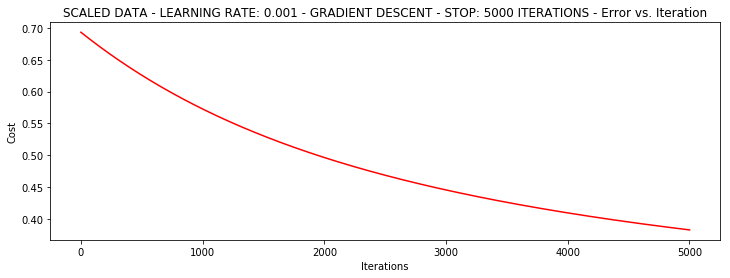

In [20]:
# 我们看看对数据进行处理能不能提升

from sklearn import preprocessing as pp

scaled_data = dataMat.copy()

# preprocessing.scale将数据转化两列成绩特征为标准正态分布（均值0方差1）
scaled_data[:, 1:3] = pp.scale(dataMat[:, 1:3])

# 迭代5000次
runExp(scaled_data, theta, n, STOP_ITER, thresh=5000, alpha=0.001)

Scaled data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.02 Theta: [[1.0707921  2.63030842 2.41079787]] - Iter: 59422 - Last cost: 0.22 - Duration: 18.85s


array([[1.0707921 , 2.63030842, 2.41079787]])

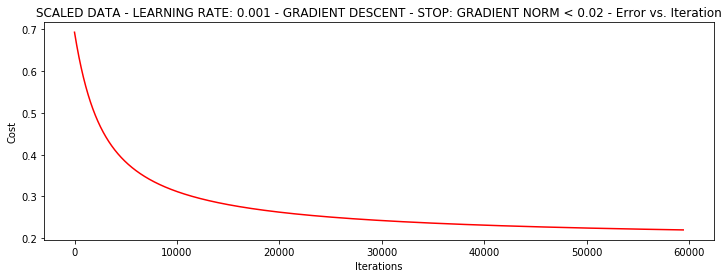

In [21]:
# 从上面可以看到last cost相对于用原始数据，收敛了不少
# 更换迭代方式，这次用范数控制
runExp(scaled_data, theta, n, STOP_GRAD, thresh=0.02, alpha=0.001)

Scaled data - learning rate: 0.001 - Stochastic descent - Stop: gradient norm < 0.0004 Theta: [[1.14872119 2.79019804 2.5681283 ]] - Iter: 72583 - Last cost: 0.22 - Duration: 7.40s


array([[1.14872119, 2.79019804, 2.5681283 ]])

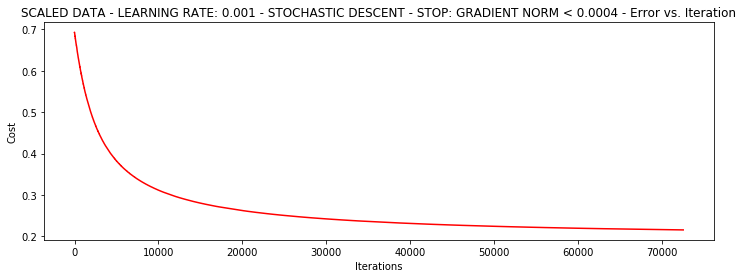

In [22]:
# 采用随机下降，设置norm控制
runExp(scaled_data, theta, 1, STOP_GRAD, thresh=0.002 / 5, alpha=0.001)

Scaled data - learning rate: 0.001 - Mini-batch (16) descent - Stop: gradient norm < 0.004 Theta: [[1.09003769 2.66483453 2.44163721]] - Iter: 61866 - Last cost: 0.22 - Duration: 7.99s


array([[1.09003769, 2.66483453, 2.44163721]])

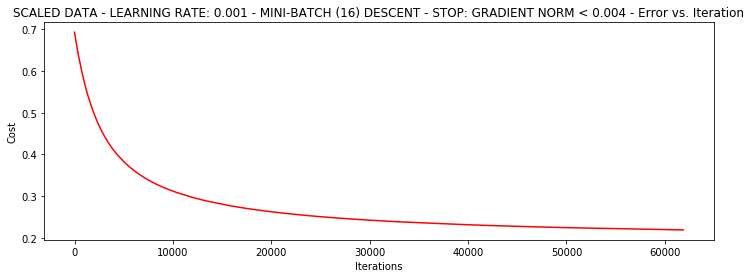

In [23]:
# 小批量下降，norm阈值控制
runExp(scaled_data, theta, 16, STOP_GRAD, thresh=0.002*2, alpha=0.001)

Scaled data - learning rate: 0.001 - Stochastic descent - Stop: gradient norm < 0.0004 Theta: [[1.14802676 2.79119888 2.56849422]] - Iter: 72624 - Last cost: 0.22 - Duration: 7.04s
accuracy = 89%


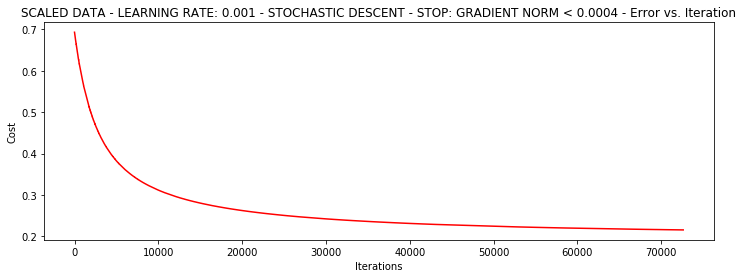

In [24]:
# 最后我们看一下这些分类的精度如何
def predict(X, theta):
    return [1 if x >= 0.5 else 0 for x in model(X, theta)]

# 特征值
scaled_X = scaled_data[:, :3]
# 分类
y = scaled_data[:, 3]

# 用随机下降和norm控制的方案得出theta
theta = runExp(scaled_data, theta, 1, STOP_GRAD, thresh=0.002 / 5, alpha=0.001)
predictions = predict(scaled_X, theta)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {}%'.format(accuracy))

在这章练习里，我们学到了使用逻辑回归的计算方式来进行数据训练和学习。我们可以看到通过采用不同的迭代方式，我们训练的时长和误差也随之变化。
逻辑回归是最经典的一个分类器，尤其对于公式的运用，需要好好记牢。